In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy.special
import seaborn as sns
import pandas as pd
import requests
import PIL
import scipy.stats
import sklearn.linear_model

# *all things logistic regression - follows on from 1LIN_REG.ipynb & 2LIN_REG_SE.ipynb*

https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf

# **LOGISTIC REGRESSION**




Logistic regression is an extension of linear regression which is "Linear" on the log-it scale

Log-odds of the event is a linear combination of one or more independent variables

The function that converts log-odds to probabiliy is the LOGISTIC FUNCTION 

The unit of measurement on hte log-odds scale is called a LOGIT


?OLS uses "normal" probability theory whil logistic regresion uses binomial probabiliy theory





## **THE LOGIT**


let the linear predictor be denotes as $Z = X\beta = \beta_0 + \beta_1x_1 +  \beta_2x_2 +  \beta_3x_3 + ... $ 

where $x_i$ is the ith predictor

the lienar regression equation is 

$ y = X\beta = Z $ 

(linear model)

\left|
\begin{array}{l}
\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{\epsilon} \\
 \mathbf{\epsilon} \sim N(0, \sigma^2 \mathbf{I}),
\end{array}
\right.

but...



We want to confine our prediction y to be between 0 and 1 so

**we utilize the sigmoid function**

$ y = \dfrac{ e^{Z} } { 1+e^{Z} } $

which following some simple algebra gives us 

the log odds or logit expression= 

$ ln(\dfrac{y}{1-y}) = Z $

LITERALLY THE LOG OF THE ODDS



Bounds function between 0 and 1 - and allows negative x's 
Most practical convertion of (-inf,inf) to [0,1]

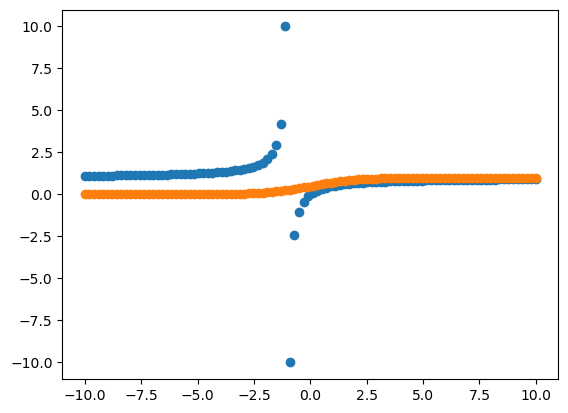

In [8]:
#testing   

x = np.linspace(-10,10,100)

y1 = x/(1+x)

y2 = np.exp(x)/(1+np.exp(x))

# y3 = np.log(x)/(1+np.log(x))

#expoentiation stops x from going negative! and means that as x gets more negative e^x 
#gets smaller- if instead we took the absolute value it would start increasing with more negative x
#this is the logit

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y1)
ax.scatter(x,y2)


# **INTERPRETATIONS/MODEL EXPLAINATION**

There are several equivalent specifications and interpretations of logistic regression


## *GENERALIZED LINEAR MODEL*

The different between log regresion and standard LR (or other types of regression used for binary value outcomes) is hte way hte probability of a particular outcome is linked to the predictor function  (AS DESCRIBED ABOVE)

Linear as hte log-oods are posited to change as a linear function of the predictors

$ logit( E[y_i|X_i] )  = logit(p_i) = \ln\bigg(\dfrac{p_i}{1-p_i}\bigg) = X_i\beta$

The "logit" is the LINK FUNCTION of hte generalized linear model - you can use other link fucntion with binomial yi variables e.g. probit regression uses hte standard normal quantile (inverce CDF) function

The GLM predicts variables with various types of probability distributs by fitting a linear predicto function of hte above form to some sort of arbitrary transformation of hte exprcted value of th variable


The intuition for transorming using hte logit function was shown above

Note that both probabilities p_i and the coefficients B_i are unobserved

The way to determine these is not part of hte model itself......

Typically deterimined usig  some optimizing procedure - e.g. MLE to find values that best fir the observed data - usually subject to regularizatio conditions that seek to exclude unlikely values (e.g. extrmely large coefficients)

The use of a REGULTIZATION condition is equivalent to doing MAXIMUM A POSTERIORI (MAP) estimation - an extrneiosn of MLE

*regularization is most commonly done suring a squared regularization function which is equivalent to placing a zero0mean Gaussian prioir distribution on the coefficients but other regluzrizers re also possible


The interpretation of hte Bj parameters estimates is hte addiciet effect of hte log of hte odds for a unit change in the j explanatory variable - in the simple dichotomous case e^B is the estiamtes of hte odds between the 2 groups

we can then write the likelihood function out - assuming the outcome is a BERNOULLI random variable (the building block of the binomila distribution)

$Pr(Y_i = y | X_i) = p_i^y(1-p_i)^{1-y} $ 

Where hte linear predictor is p_i


for linear regression instead we are working with a continuous random variables that we assume to be i.i.d normal with means at the values y_i and standard deviations that dont matter as they cancel out - out linear predictor is thus a random variable and we can calculatet hte probability of it being drawn out of that r.v. distribution

For log regression instead - our liaer predictor is the p_i probability - which is hte expected value of hte bernoulli - 

this is slightly counter intuitive as the bernoulli r.v. can never actually take the value of p_i that we predict so we cant 

BUT WE CAN

what we really want is hte probability of all the data given the "model"

in the linear regression example the LP_i is the mean of the normal distributions based on hte predictors and then we can work out the probability of eachd ata point 

here instead the LP is fed into the logit function to give the probability of the Xi being 1 and then we can work out the probability 

Then simply sum these up....

$Pr(Y_i = y | X_i) = p_i^y(1-p_i)^{1-y} \\
where ~p_i = \dfrac{e^z}{1+e^z}$ 


## *IN TERMS OF BINOMIAL DATA*

described above


# **PARAMETER ESTIMATION**

The parameter are most commonly estiamte using MLE - 
    this does not have a closed-form expression unlike linear least squares even if regularizers are used


    Thus we need to use iterative numerial methods
        e.g. iteratively reweighted least sqauares (IRLS) or more commonly a QUASI_NEWTON METHODS such as L_BFGS

    

to do MLE we need to make some assumptions about the nature of error - we just assume that all the outcomes are bernoulli random variables :)

Logistic regresion model:

MODEL DOES NOT ALWAYS CONVERGE
    - e.g. if complete seperation of 
    
$Pr(Y_i = y | X_i) = p_i^y(1-p_i)^{1-y} \\
where ~p_i = \dfrac{e^z}{1+e^z}$ 

use simple algebra to get

$ Pr(Y_i = y | X_i) = \dfrac{e^{z_iy_i}}{1+e^{z_i}} $

Likelihood = joint probability of all events

since we assume events are independent this is simple the product of all the individuals

$ L(data|X_i) = \prod \dfrac{e^{z_iy_i}}{1+e^{z_i}} $


# ITERATIVELY REWEIGHTED LEAST SQUARE = EQUIVALENT TO MAXIMIZING THE LOG_LIKELIHOOD OF A BERNOULLI DISTRIBUTED PROCESS USING NEWTON's METHOD - according to wikipedia

so that is what we will do...

when we take the log likelihood we can split up hte product into a sum

$ \begin{align}
l(data|X_i) &= ln(\prod \dfrac{e^{z_iy_i}}{1+e^{z_i}}) \\
&= \sum ln(\dfrac{e^{z_iy_i}}{1+e^{z_i}}) \\
&= \sum ln(e^{z_iy_i}) - ln({1+e^{z_i}}) \\
&= \sum z_iy_i - ln({1+e^{z_i}}) \\
&= \sum (b_0 + b_ix_i)y_i - ln({1+e^{b_0 + b_ix_i}})
\end{align}$


Now differentiate with respect to b_1

$ \begin{align}
dl(data|X_i)/db_1 
&= \sum x_iy_i -  (ln({1+e^{b_0 + b_ix_i}}))d/db_1 \\
&= \sum x_iy_i -  \dfrac { { (1+e^{b_0 + b_ix_i}} )d/db_1 }{1+e^{b_0 + b_ix_i}} \\
&= \sum x_iy_i -  \dfrac { x_ie^{ b_0+b_ix_i }}{1+e^{b_0 + b_ix_i}} \\
&= \sum x_i(y_i - \dfrac { e^{ b_0+b_ix_i } }{1+e^{b_0 + b_ix_i}}) \\
&= \sum x_i(y_i - 1 + \dfrac { 1} {1+e^{b_0 + b_ix_i}})
\end{align}$

Double differentiate to get the differential of hte score - to use with newtons algorithm

$ \begin{align}
dl(data|X_i)/db_1^{2} 
&= \sum - x_i^2 e^{b_0+b_ix_i} \dfrac {1}{(1+e^{b_0 + b_ix_i})^2}
\end{align}$


In practice uses IRLS - which utilizes some more advanced linear algebrea


Rule of 10

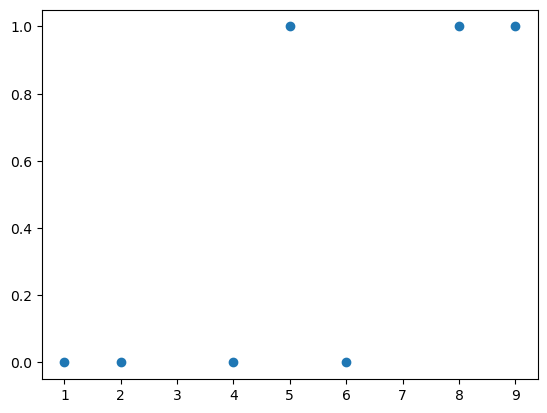

In [4]:
#testing this out in hte univariate case


#Creating sample data

Y = np.array([0,0,0,1,0,1,1])

X = np.array([1,2,4,5,6,8,9])

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X,Y)




In [5]:
#defining log likelihood function to allow interative optimization

def score_b1(Y,X,B):
    # Y =  array of Y values (outputs)
    # X = matrix or array of predictors
    # B = array of coefficients

    #start with case without interceot
    b0 = 0
    b1 = B

    #i think numpy does shit elementwise but ill do it manually first
    output = 0
    for yi,xi in zip(Y,X):
        #output += xi*yi - ( (xi*np.exp(b0+b1*xi)) / (1 + np.exp( b0 + b1*xi)) )
        output += xi * (yi -  np.exp( b0 + b1*xi) / (1 + np.exp( b0 + b1*xi)))  #equivalent form
    return output

    #can write it out more clever using @ but will save that for later

def dscore_db1(Y,X,B):
    #differential of score function

    #start with case without interceot
    b0 = 0
    b1 = B

    #i think numpy does shit elementwise but ill do it manually first
    output = 0
    for yi,xi in zip(Y,X):
        
        output += ( (- xi**2 * np.exp(b0 + b1*xi) ) / (1 + np.exp( b0 + b1*xi))**2)  #equivalent form
    return output

    return 0
    

-56.75
[0.082]


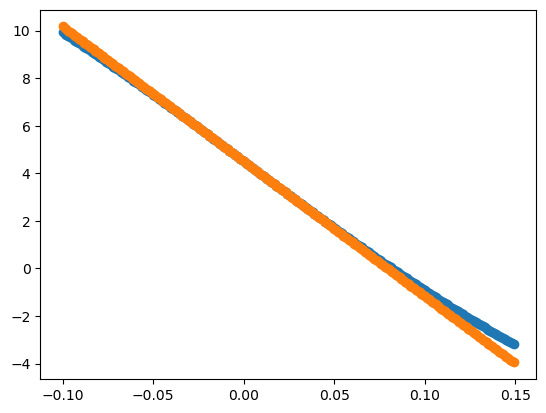

In [6]:
#use newtons method to find when score 
B = np.arange(-0.1,0.15,0.001)

score = score_b1(Y,X,B)
dscore = dscore_db1(Y,X,0)
print(dscore)
gradientLine = dscore*B + score_b1(Y,X,0) 

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(B,score)
ax.scatter(B,gradientLine)

print(B[abs(score) == min(abs(score))])


[0.]
[[0.08176402]]


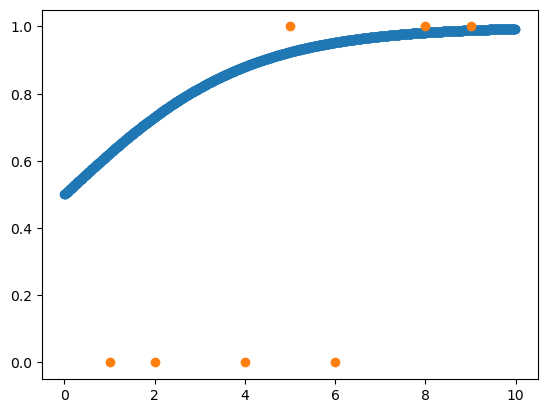

In [7]:
#fitting logistric regression prediction on data
B = np.array([0,0.5])
b0 = B[0]
b1 = B[1]

logregfit = sklearn.linear_model.LogisticRegression(penalty = "none",   fit_intercept=False)
#logregfit = sklearn.linear_model.LogisticRegression(penalty = "none")
logregfit.fit(X.reshape(-1,1),Y)
print(logregfit.intercept_)
print(logregfit.coef_)

logregfit.predict(np.array([1]).reshape(-1,1))

x_test = np.arange(0,10,0.01)
y_hat_test = np.exp(b0+b1*x_test)/(1+np.exp(b0+b1*x_test))
logreg_pred = logregfit.predict(x_test.reshape(-1,1))


plt.scatter(x_test,y_hat_test)
#plt.scatter(x_test,logreg_pred)
plt.scatter(X,Y)


logistic regression is hte maximum entropy soluiton

proof on wikipedia - using lagrande multipliers

# Intercept

now we differentiate with respect to b_0

can differentiate inside the sum 

$ \begin{align}
dl(data|X_i)/db_0 
&= \sum y_i -  (ln({1+e^{b_0 + b_ix_i}}))d/db_0 \\
&= \sum y_i -  \dfrac { { (1+e^{b_0 + b_ix_i}} )d/db_0 }{1+e^{b_0 + b_ix_i}} \\
&= \sum y_i -  \dfrac { e^{b_0 + b_ix_i} }{1+e^{b_0 + b_ix_i}}
\end{align}$

# Testing calibration
